# 1940

In [1]:
import pandas as pd
import numpy as np

#from PIL import Image

from os import listdir
from os.path import isfile, join
from pandas import ExcelWriter

In [2]:
#%ls

In [3]:
file_path='./Data/Input/1940/Processed_0_1_Pure_Table.xlsx/'
file_names = [f for f in listdir(file_path) if (isfile(join(file_path, f))&(f[0]!='~'))]
file_names.sort()
#https://stackoverflow.com/questions/3207219/how-do-i-list-all-files-of-a-directory

In [4]:
file_names_left=[]
file_names_right=[]
for i in range(len(file_names)):
    if file_names[i][0]=='~':raise NameError('Temp File Appear in NameList')
        
    if i%2==0:
        file_names_left.append(file_names[i])
    else:
        file_names_right.append(file_names[i])        

In [5]:
form_raw_list_left=[]
for file_name in file_names_left:
    if file_name[0]!='~':# exclude temp file name
        #print(file_name) # to check error
        form_raw_list_left.append(pd.read_excel(file_path+file_name,header=None))#,index_col=0))


form_raw_list_right=[]
for file_name in file_names_right:
    if file_name[0]!='~':# exclude temp file name
        #print(file_name) # to check error
        form_raw_list_right.append(pd.read_excel(file_path+file_name,header=None))#,index_col=0))

# Raw_Cleaning_Rows

### left

In [6]:
row_num_list_left=[len(df.columns) for df in form_raw_list_left]

In [7]:
row_num_error_list_left=[]
for i in range(len(row_num_list_left)):
    if row_num_list_left[i]!=20:
        print(2*i+1,row_num_list_left[i])
        row_num_error_list_left.append(2*i+1)        

In [8]:
row_num_error_list_left

[]

In [9]:
form_raw_list_left[1].head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,NaN,NaN,NaN,NaN,NaN,1,NaN,2,NaN,3,NaN,4,NaN,s,NaN,6,NaN,7,NaN,8
1,6,COUNTY AND CITY (With 1940 Population),Total,NaN,Pood,group,General stores (with food),NaN,General merchandise group,NaN,Apparel group,NaN,Furniture-household-radio group,NaN,Automotive group,NaN,Filling stations,NaN,Lumber- building- hardware,NaN
2,c J,NaN,Stores,Sales,Stores,Sales,Stores,Sales,Stores,Sales,Stores,Sales,Stores,Sales,Stores,Sales,Stores,Sales,Stores,Sales
3,65,"Fayette County 21,651",148,#2.200,43,#406,19,#385,9,#232,3,#22,2,(x),6,#450,27,#209,7,#217
4,66,"Fayette- --- 2,668",66,1546,12,248,51,62,NaN,184,3,22,2,W,6,450,8,128,5,(x)


In [10]:
form_raw_list_left[0].loc[2]

0                           1
1     State Total___2,832,961
2                      23.916
3                    *435.973
4                       8.802
5                      593.91
6                       2.033
7                     636.747
8                         934
9                     655.497
10                        915
11                     28.239
12                        706
13                    621.232
14                        603
15                    671.565
16                       3.75
17                      34249
18                        610
19                      22093
Name: 2, dtype: object

In [11]:
row_num_list_right=[len(df.columns) for df in form_raw_list_right]

In [12]:
row_num_error_list_right=[]
for i in range(len(row_num_list_right)):
    if row_num_list_right[i]!=17:
        print(2*i+2,row_num_list_right[i])
        row_num_error_list_right.append(2*i+2)

In [13]:
row_num_error_list_right

[]

In [14]:
form_raw_list_right[3].head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,9 Eating and drinking places,NaN,10 Drug stores,NaN,11 Other stores,NaN,SEPARATE KINDS OP BUSINESS (INCLUDED ALSO IN G...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,"Grocery, conibination stores (Part of Group 1)",NaN,Hardware stores (Part of Group S),NaN,"Restaurants, other eating places (Pari of Grou...",NaN,Liquor stores (packaged goods) (Pari oj Group 11),NaN,"Feed, farm, garden supplies (Part of Group 11)",NaN,£
2,Stores,Sales,Stores,Sales,Stores,Sales,Stores,Sales,Stores,Sales,Stores,Sales,Stores,Sales,Stores,Sales,c
3,1*336,14949,194,7424,692,10514,1.388,32115,48,3123,843,8500,42,784,53,1985,1
4,16,96,3,(x),11,14,17,215,—,—,13,46,—,—,—,—,2


# Raw_Cleaning_Columns

In [15]:
def is_number(x):
    if pd.isnull(x): return False
    return isinstance(x, (int, float))
#https://stackoverflow.com/questions/4187185/how-can-i-check-if-my-python-object-is-a-number

In [16]:
is_number(1)

True

In [17]:
def find_anchor_left(df):
    for i in range(2,len(df)):
        if is_number(df.iloc[i][4]) or is_number(df.iloc[i][2]) or is_number(df.iloc[i][16]) or is_number(df.iloc[i][18]):
            return i
anchor_list_left= [find_anchor_left(df) for df in form_raw_list_left]

In [18]:
total_length_list_left= [len(df) for df in form_raw_list_left]

In [19]:
data_length_list_left=[ x[0]-x[1] for x in zip(total_length_list_left,anchor_list_left)]

In [20]:
def find_anchor_right(df):
    for i in range(len(df)):
        if is_number(df.iloc[i][0]) or is_number(df.iloc[i][2]) or is_number(df.iloc[i][14]) or is_number(df.iloc[i][12]):
            return i
anchor_list_right= [find_anchor_right(df) for df in form_raw_list_right]
anchor_list_right[int((262-2)/2)]=3

In [21]:
total_length_list_right= [len(df) for df in form_raw_list_right]

In [22]:
data_length_list_right=[ x[0]-x[1] for x in zip(total_length_list_right,anchor_list_right)]

In [23]:
len(data_length_list_right)==len(data_length_list_left)

True

In [24]:
data_length_diff=[x[0]-x[1] for x in zip(data_length_list_left,data_length_list_right)]

In [25]:
data_length_diff_riv_lst=[]
for i in range(len(data_length_diff)):
    if data_length_diff[i]!=0:
        print(2*i+1,anchor_list_left[i],2*i+2,anchor_list_right[i],data_length_diff[i])
        data_length_diff_riv_lst.append( (2*i+1,anchor_list_left[i],2*i+2,anchor_list_right[i],data_length_diff[i]) )
        

In [26]:
#form_raw_list_left[2]

In [27]:
len(data_length_diff_riv_lst)

0

In [33]:
data_length_diff_riv_lst

[]

In [29]:
temp_left=261
i=int((temp_left-1)/2)
data_length_list_left[i],data_length_list_right[i]
#262 anchor wrong, 3

(58, 58)

In [30]:
172-115+1

58

In [31]:
'''rev_lst: 5,11,23,31,35,42,43,46,48,50'''
'''51,54,56,[64],[66],68,69,71,85,[88],[92],99'''
'''101,109,117,118,120,121,125,129,136,143,145,148,159?,165,167,169,[174]'''
'''171,179,[188],189,191,195,199,201,[208],[212],215,222,224,228,[234],235,242,244,249,[260]'''
'''262?,267,270,276'''


'''56,159,208,260'''

'56,159,208,260'

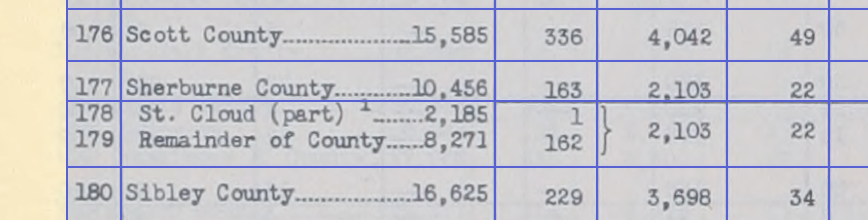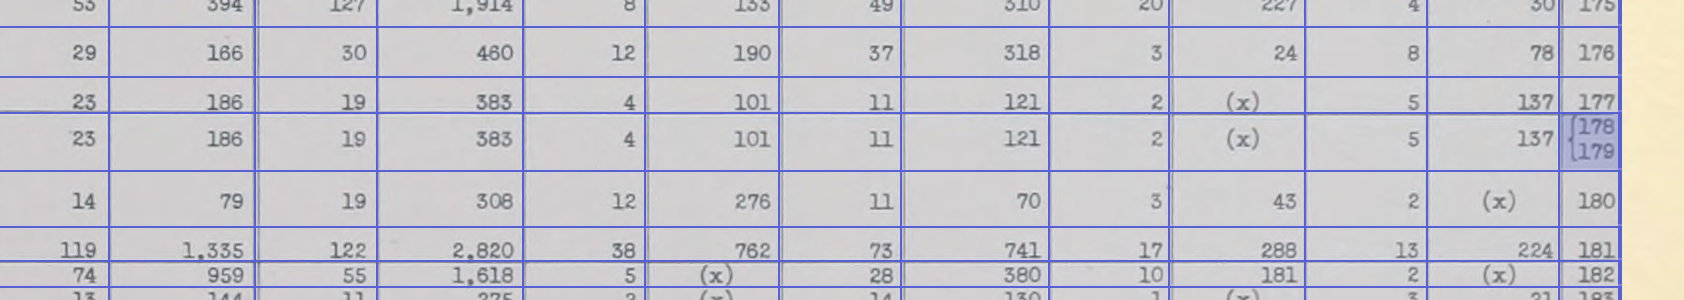

P125

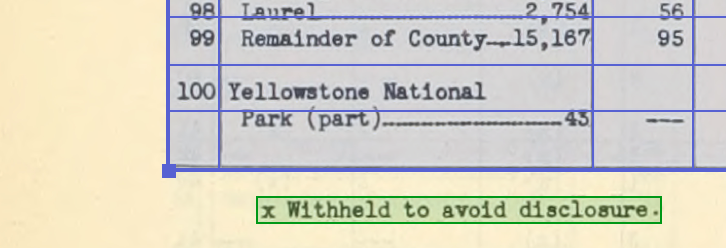

P145

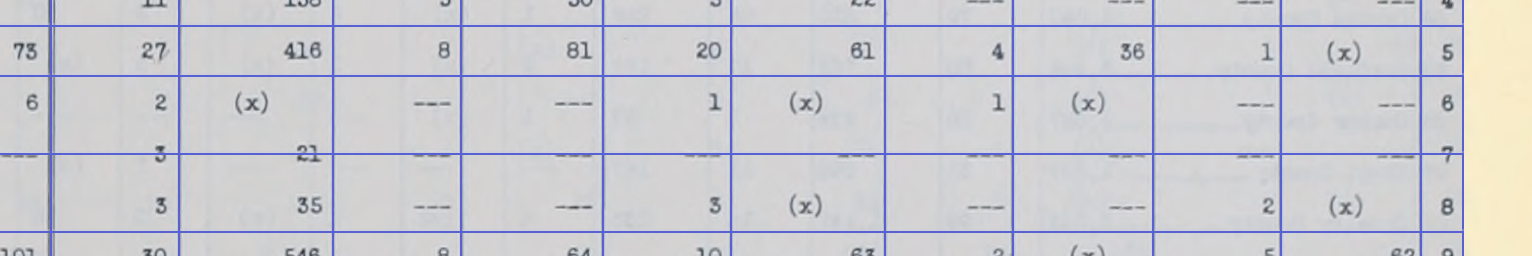

P148
...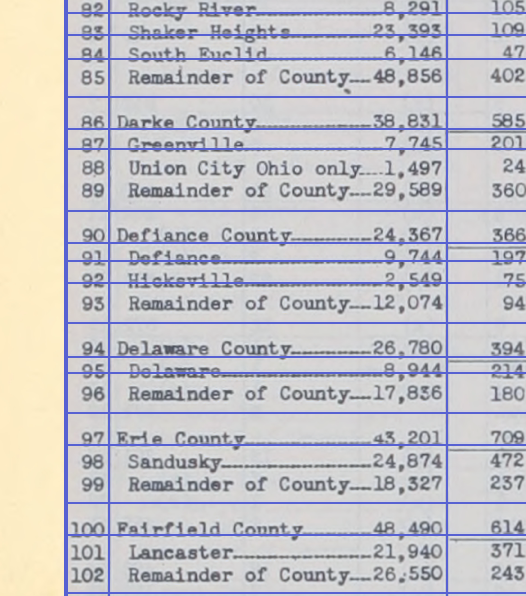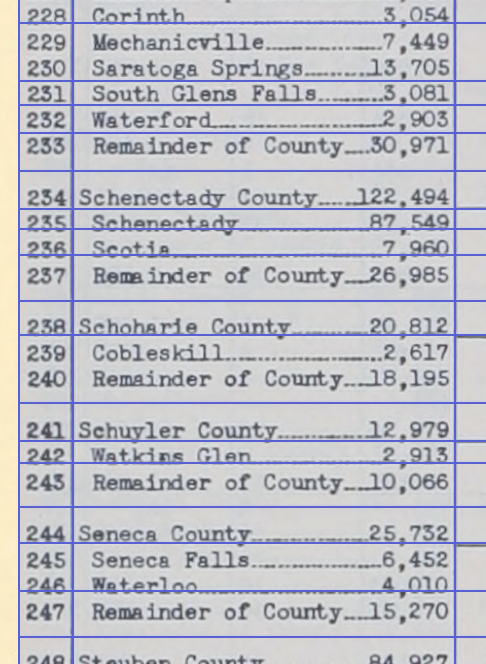

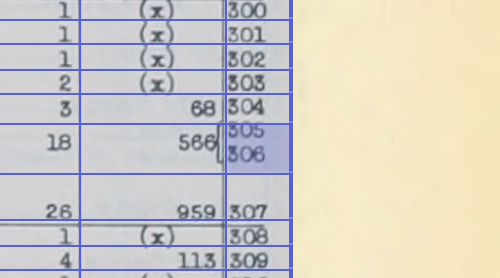
P196

P250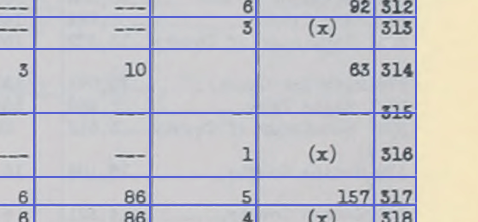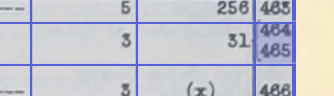

# aligned df

In [34]:
form_aligned_list_left = [df.iloc[idx:] for (df,idx) in zip(form_raw_list_left,anchor_list_left)]
form_aligned_list_right = [df.iloc[idx:] for (df,idx) in zip(form_raw_list_right,anchor_list_right)]

In [36]:
form_aligned_list_left[0].head(1)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
2,1,"State Total___2,832,961",23.916,*435.973,8.802,593.91,2.033,636.747,934,655.497,915,28.239,706,621.232,603,671.565,3.75,34249,610,22093


In [41]:
form_aligned_list_right[0].head(1)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
3,24696_,420.135,833,16117,2.034,S36.1B9,8.13,89665,297,8431,2.145,15279,69,9120,340,9809,1


In [48]:
form_aligned_list_left[0].reset_index().drop('index',axis=1)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,1,"State Total___2,832,961",23.916,*435.973,8.802,593.91,2.033,636.747,934,655.497,915,28.239,706,621.232,603,671.565,3.75,34249,610,22093
1,2,"Autauga County----20,977",148,"• 1,460",57,481,20,289,2,(x),5,37,3,n,3,69,34,264,3,88
2,3,"Baldwin County------32,324",381,5018,136,1354,13,288,18,208,3,17,15,122,10,1018,83,683,16,564
3,4,"Barbour County . _ _32,722",259,3.087,92,728,13,160,20,358,8,109,9,99,8,652,48,327,8,232
4,5,"Eufaula--- _ — 6,269",91,1832,25,327,2,(x),6,155,6,(x),5,79,6,(x),7,ne,3,135
5,6,"Remainder of County—26,453",168,1255,67,401,11,(x),14,203,2,(x),4,20,2,(x),41,209,5,97
6,7,"Bibb County---20,155",154,1948,49,252,35,709,6,303,3,26,4,55,6,380,14,81,3,31
7,8,"Blount County----29,490",226,2365,66,304,37,512,11,204,1,(x),5,36,5,479,56,279,8,130
8,9,"Bullock County . _ -19,810",193,1.679,103,454,20,224,8,240,2,(x),4,28,3,185,17,U7,6,60
9,10,"Union Springs .. — 3,107",81,1195,27,222,2,(x),8,240,2,(x),3,”TxJ ^,3,185,5,64,5,(x)


In [49]:
df_test=pd.concat([form_aligned_list_left[0].reset_index().drop('index',axis=1),form_aligned_list_right[0].reset_index().drop('index',axis=1)], axis=1, ignore_index=True)

In [50]:
df_test.head(3)

,0,1,2,3,4,5,6,7,8,9,...,27,28,29,30,31,32,33,34,35,36
0,1,"State Total___2,832,961",23.916,*435.973,8.802,593.91,2.033,636.747,934,655.497,...,89665,297,8431,2.145,15279,69,9120,340,9809,1
1,2,"Autauga County----20,977",148,"• 1,460",57,481,20,289,2,(x),...,474,2,(x),9,16,—,—,1,(x),2
2,3,"Baldwin County------32,324",381,5018,136,1354,13,288,18,208,...,1267,8,268,21,72,3,(x),13,340,3


In [51]:
form_aligned_list= [pd.concat([df1.reset_index().drop('index',axis=1),df2.reset_index().drop('index',axis=1)], axis=1, ignore_index=True) for (df1,df2) in zip(form_aligned_list_left,form_aligned_list_right)]

In [52]:
form_aligned_list[0].head(3)

,0,1,2,3,4,5,6,7,8,9,...,27,28,29,30,31,32,33,34,35,36
0,1,"State Total___2,832,961",23.916,*435.973,8.802,593.91,2.033,636.747,934,655.497,...,89665,297,8431,2.145,15279,69,9120,340,9809,1
1,2,"Autauga County----20,977",148,"• 1,460",57,481,20,289,2,(x),...,474,2,(x),9,16,—,—,1,(x),2
2,3,"Baldwin County------32,324",381,5018,136,1354,13,288,18,208,...,1267,8,268,21,72,3,(x),13,340,3


# State info

In [53]:
s_file_path='./Data/Input/1940/Processed_0_1_HaveOutside.xlsx/'
s_file_names = [f for f in listdir(s_file_path) if (isfile(join(s_file_path, f))&(f[0]!='~'))]
s_file_names.sort()

s_file_names_left=[]
s_file_names_right=[]
for i in range(len(s_file_names)):
    if s_file_names[i][0]=='~':raise NameError('Temp File Appear in NameList')
        
    if i%2==0:
        s_file_names_left.append(s_file_names[i])
    else:
        s_file_names_right.append(s_file_names[i])   

s_form_raw_list_left=[]
for file_name in s_file_names_left:
    if file_name[0]!='~':# exclude temp file name
        #print(file_name) # to check error
        s_form_raw_list_left.append(pd.read_excel(s_file_path+file_name,header=None,nrows=20))#,index_col=0))


s_form_raw_list_right=[]
for file_name in s_file_names_right:
    if file_name[0]!='~':# exclude temp file name
        #print(file_name) # to check error
        s_form_raw_list_right.append(pd.read_excel(s_file_path+file_name,header=None,nrows=20))#,index_col=0))

In [54]:
s_form_raw_list_left[0]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,218,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,CENSUS OF BUSINESS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,table 15— counties and all places,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Stores and Sales by Major Business,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,ALABAMA (Sales are expressed in,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [55]:
s_form_raw_list_right[0]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,RETAIL TRADE: 1939,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,219,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"OF MORF. THAN 2,500 POPULATION",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Groups and 5 Separate Kinds of Business,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,thousands of dollars) ALABAMA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [56]:
US_states=['Alabama','Alaska','Arizona','Arkansas','California','Colorado',
        'Connecticut','Delaware','District of Columbia','Florida','Georgia','Hawaii','Idaho', 
        'Illinois','Indiana','Iowa','Kansas','Kentucky','Louisiana',
        'Maine' 'Maryland','Massachusetts','Michigan','Minnesota',
        'Mississippi', 'Missouri','Montana','Nebraska','Nevada',
        'New Hampshire','New Jersey','New Mexico','New York',
        'North Carolina','North Dakota','Ohio',    
        'Oklahoma','Oregon','Pennsylvania','Rhode Island',
        'South  Carolina','South Dakota','Tennessee','Texas','Utah',
        'Vermont','Virginia','Washington','West Virginia',
        'Wisconsin','Wyoming']

In [58]:
def report_state(state_raw_df):
    for state in US_states:
        for string in state_raw_df[0]:
            try:
                if state.lower() in string.lower(): 
                    return state
            except:
                pass
    return None

In [59]:
state_list_left=[report_state(df) for df in s_form_raw_list_left]
state_list_right=[report_state(df) for df in s_form_raw_list_right]

In [61]:
sum([state_left!=state_right for state_left,state_right in zip(state_list_left,state_list_right)])

21

In [60]:
state_list_left

['Alabama',
 'Alabama',
 'Alabama',
 'Arizona',
 'Arkansas',
 'Arkansas',
 'Arkansas',
 'California',
 'California',
 'California',
 'California',
 'Colorado',
 'Colorado',
 'Connecticut',
 'Connecticut',
 'Connecticut',
 'Delaware',
 'Florida',
 'Florida',
 'Florida',
 'Georgia',
 'Georgia',
 'Georgia',
 'Georgia',
 'Georgia',
 None,
 'Idaho',
 'Illinois',
 None,
 'Illinois',
 'Illinois',
 'Illinois',
 'Illinois',
 'Indiana',
 'Indiana',
 'Indiana',
 'Indiana',
 None,
 'Iowa',
 'Iowa',
 'Iowa',
 'Kansas',
 'Kansas',
 'Kansas',
 'Kansas',
 'Kentucky',
 'Kentucky',
 'Kentucky',
 'Kentucky',
 'Louisiana',
 'Louisiana',
 'Louisiana',
 None,
 None,
 'Massachusetts',
 'Massachusetts',
 'Michigan',
 'Michigan',
 'Michigan',
 'Michigan',
 'Minnesota',
 'Minnesota',
 'Minnesota',
 'Minnesota',
 'Mississippi',
 'Mississippi',
 'Mississippi',
 'Missouri',
 'Missouri',
 'Missouri',
 'Missouri',
 'Montana',
 'Montana',
 'Nebraska',
 'Nebraska',
 'Nebraska',
 'Nevada',
 'New Hampshire',
 None,
 'Ne

In [63]:
pd.notnull(None)

False

In [64]:
state_list=[]
for state_left,state_right in zip(state_list_left,state_list_right):
    if pd.notnull(state_left):
        state_list.append(state_left)
    elif pd.notnull(state_right):
        state_list.append(state_left)
    else:
        state_list.append(None)

In [65]:
sum([pd.isnull(x) for x in state_list])

14

In [66]:
for i in range(1,len(state_list)):
    if pd.isnull(state_list[i]):
        state_list[i]=state_list[i-1]

In [67]:
sum([pd.isnull(x) for x in state_list])

0

In [68]:
len(state_list)

139

In [69]:
len(form_aligned_list)

139

In [70]:
for form,state in zip(form_aligned_list,state_list):
    form[37]=state

In [71]:
df_output=pd.concat(form_aligned_list,ignore_index=True)

In [72]:
df_output.drop([0,36],axis=1,inplace=True)

In [73]:
df_output.head(3)

,1,2,3,4,5,6,7,8,9,10,...,27,28,29,30,31,32,33,34,35,37
0,"State Total___2,832,961",23.916,*435.973,8.802,593.91,2.033,636.747,934,655.497,915,...,89665,297,8431,2.145,15279,69,9120,340,9809,Alabama
1,"Autauga County----20,977",148,"• 1,460",57,481,20,289,2,(x),5,...,474,2,(x),9,16,—,—,1,(x),Alabama
2,"Baldwin County------32,324",381,5018,136,1354,13,288,18,208,3,...,1267,8,268,21,72,3,(x),13,340,Alabama


# Index

In [74]:
len(df_output.columns)

36

In [75]:
colname_list= [('Location','County and city'),('Total','Stores'),('Total','Sales'),
               ('Food group','Stores'),('Food group','Sales'),
               ('General stores (with food)','Stores'),('General stores (with food)','Sales'),
               ('General merchandise group','Stores'),('General merchandise group','Sales'),
               ('Apparel group','Stores'),('Apparel group','Sales'),
               ('Furniture-household-radio group','Stores'),('Furniture-household-radio group','Sales'),
               ('Automotive group','Stores'),('Automotive group','Sales'),
               ('Filling stations','Stores'),('Filling stations','Sales'),
               ('Lumber-building-hardware','Stores'),('Lumber-building-hardware','Sales'),
               ('Eating and drinking places','Stores'),('Eating and drinking places','Sales'),
               ('Drug stores','Stores'),('Drug stores','Sales'),
               ('Other stores','Stores'),('Other stores','Sales'),
               ('Grocery, combination stores (Group 1)','Stores'),('Grocery, combination stores (Group 1)','Sales'),
               ('Hardwares stores (Group 8)','Stores'),('Hardwares stores (Group 8)','Sales'),
               ('Restaurants, other eating places (Group 9)','Stores'),('Restaurants, other eating places (Group 9)','Sales'),
               ('Liquor stores (Group 11)','Stores'),('Liquor stores (Group 11)','Sales'),
               ('Feed, farm, garden supplies (Group 11)','Stores'),('Feed, farm, garden supplies (Group 11)','Sales'),
               ('Location','State')]
df_output.columns=pd.MultiIndex.from_tuples(colname_list)

In [76]:
len(colname_list)

36

In [77]:
df_output.head(3)

Location   Total           Food group          \
              County and city  Stores     Sales     Stores   Sales   
0     State Total___2,832,961  23.916  *435.973      8.802  593.91   
1    Autauga County----20,977     148   • 1,460         57     481   
2  Baldwin County------32,324     381      5018        136    1354   

  General stores (with food)          General merchandise group           \
                      Stores    Sales                    Stores    Sales   
0                      2.033  636.747                       934  655.497   
1                         20      289                         2      (x)   
2                         13      288                        18      208   

  Apparel group   ...    Grocery, combination stores (Group 1)  \
         Stores   ...                                    Sales   
0           915   ...                                    89665   
1             5   ...                                      474   
2             3   ...                                     1267   

  Hardwares stores (Group 8)       Restaurants, other eating places (Group 9)  \
                      Stores Sales                                     Stores   
0                        297  8431                                      2.145   
1                          2   (x)                                          9   
2                          8   268                                         21   

         Liquor stores (Group 11)        \
   Sales                   Stores Sales   
0  15279                       69  9120   
1     16                        —     —   
2     72                        3   (x)   

  Feed, farm, garden supplies (Group 11)       Location  
                                  Stores Sales    State  
0                                    340  9809  Alabama  
1                                      1   (x)  Alabama  
2                                     13   340  Alabama  

[3 rows x 36 columns]

In [78]:
out_put_year=1940
file_path='./Data/Processed/'
writer = ExcelWriter(file_path+str(out_put_year)+'.xlsx')
df_output.to_excel(writer)
writer.save()